# Recognizing and predicting diabetes

# ======================================

# Import libraries and read data file

In [111]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("pima-data.csv")
data.head(15)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [13]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

# First, make sure that there are no null values
# Seconds replace True and False values ​​with 0and1

In [14]:
data.isnull().values.any()

False

In [15]:
#Knowing the repetition of values
data['diabetes'].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

In [16]:
diabetis = {True:1 , False:0}
data['diabetes'] = data['diabetes'].map(diabetis)
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [17]:
true_num = len(data.loc[data['diabetes']== True])
false_num = len(data.loc[data['diabetes']== False])
true_num , false_num

(268, 500)

In [18]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

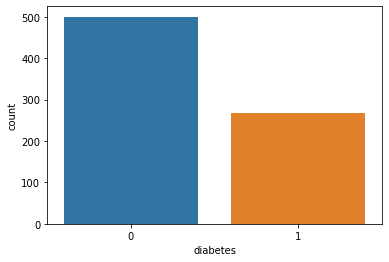

In [19]:
sns.countplot(data['diabetes'],label="count")

# split data to test and train 

In [20]:
X = data.drop('diabetes',axis='columns')
y = data.diabetes

In [124]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=50)

# Create a model and validate the results

In [125]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")
def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%") 

In [126]:
model_DTR = DecisionTreeClassifier()
model_train(model_DTR,'DecisionTreeClassifier')
kfolds(model_DTR,'DecisionTreeClassifier')

DecisionTreeClassifier model score on Train= 100.0%
DecisionTreeClassifier model score on Test= 66.66666666666666%
DecisionTreeClassifier score on cross validation: 70.84542908072319%


In [127]:
model_RFR =RandomForestRegressor()
model_train(model_RFR,'RandomForestClassifier')
kfolds(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 90.34809079736861%
RandomForestClassifier model score on Test= 16.85155279503099%
RandomForestClassifier score on cross validation: 27.361997432240447%


In [130]:
model_RFR2 = RandomForestClassifier(n_estimators=20)
model_train(model_RFR,'RandomForestClassifier')
kfolds(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 99.1869918699187%
RandomForestClassifier model score on Test= 73.33333333333333%
RandomForestClassifier score on cross validation: 74.48349036584331%


In [129]:
from xgboost import XGBClassifier
model_XG = XGBClassifier()
model_train(model_XG, "XGBoost")
kfolds(model_XG, "XGBoost")

[16:22:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model score on Train= 100.0%
XGBoost model score on Test= 80.0%
[16:22:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

In [131]:
import joblib 
joblib.dump(model_RFR2, 'model')

['model']